In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [86]:
import chardet

with open("spam.csv", 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

data = pd.read_csv("spam.csv", encoding=encoding)
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [87]:
data.shape


(5572, 5)

In [88]:
#data cleaning
#EDA
#text preprocessing
#model building
#evaluation
#improvement
#web
#deploy

1.Data Cleaning

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [90]:
data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [91]:
data.sample(5)

,v1,v2
2199,ham,Not sure I have the stomach for it ...
1294,ham,Aiyah u did ok already lar. E nydc at wheellock?
68,spam,"Did you hear about the new \Divorce Barbie\""? ..."
4943,ham,Wrong phone! This phone! I answer this one but...
3839,ham,HEY MATE! HOWS U HONEY?DID U AVE GOOD HOLIDAY?...


In [92]:
#renewing new col
data.rename(columns = {'v1':'target','v2':'text'},inplace =True)
data.sample(5)

,target,text
1602,ham,Ok pa. Nothing problem:-)
4267,ham,Hey so whats the plan this sat?
2620,ham,How come?
3330,ham,How much it will cost approx . Per month.
2389,ham,Boo. How's things? I'm back at home and a litt...


In [93]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [94]:
data['target']=encoder.fit_transform(data['target'])

In [95]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [96]:
#missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [97]:
data.duplicated().sum()

np.int64(403)

In [98]:
data=data.drop_duplicates(keep='first')

In [99]:
data.duplicated().sum()

np.int64(0)

In [100]:
data.shape

(5169, 2)

2.EDA

In [101]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

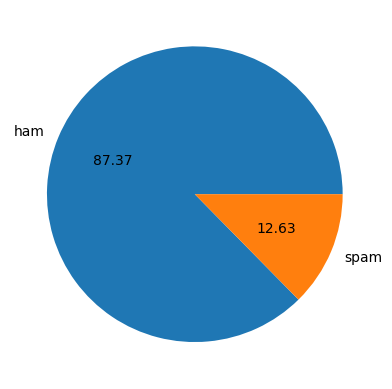

In [102]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show

In [103]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\buras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [104]:
data['num_characters']=data['text'].apply(len)

C:\Users\buras\AppData\Local\Temp\ipykernel_4972\2901880250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_characters']=data['text'].apply(len)


In [105]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [106]:
#num of words
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

C:\Users\buras\AppData\Local\Temp\ipykernel_4972\2288556487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [107]:
data['num_sentences']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

C:\Users\buras\AppData\Local\Temp\ipykernel_4972\2400669022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentences']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [108]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,18.455794
std,58.236293,13.324758,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,9.000000
50%,60.000000,15.000000,15.000000
75%,117.000000,26.000000,26.000000
max,910.000000,220.000000,220.000000


In [109]:
data[data['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,17.123782
std,56.358207,13.493970,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,90.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


In [110]:
data[data['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,27.667688
std,30.137753,7.008418,7.008418
min,13.000000,2.000000,2.000000
25%,132.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,224.000000,46.000000,46.000000


<Axes: xlabel='num_characters', ylabel='Count'>

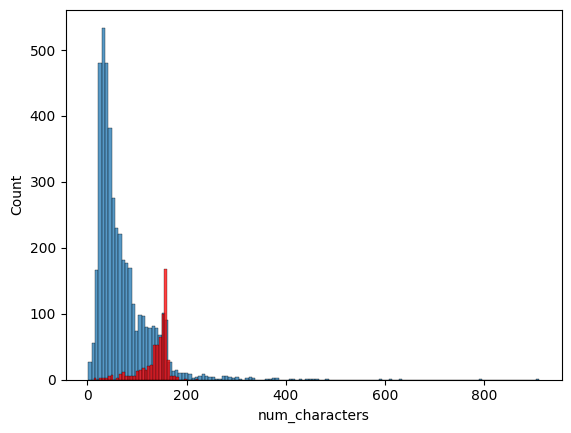

In [111]:
import seaborn as sns
sns.histplot(data[data['target']==0]['num_characters'])
sns.histplot(data[data['target']==1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

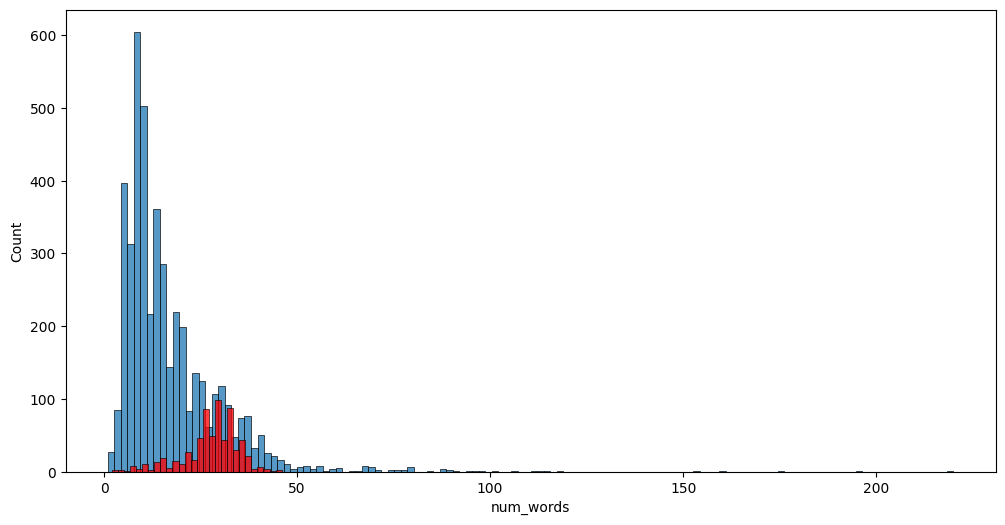

In [112]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'], color = 'red')

In [113]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')
def transform_text(text):
    text =text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)  
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [114]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [115]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [116]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [117]:
data['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [118]:
data['transformed_text']=data['text'].apply(transform_text)

C:\Users\buras\AppData\Local\Temp\ipykernel_4972\4157451465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text']=data['text'].apply(transform_text)


In [119]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


In [120]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [121]:
spam_wc=wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

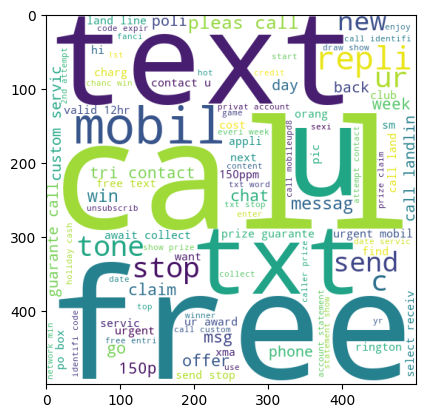

In [122]:
plt.imshow(spam_wc)

In [123]:
ham_wc=wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))

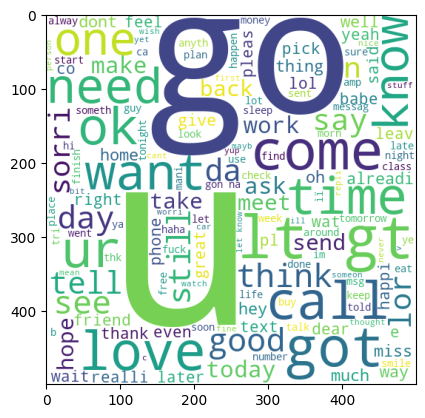

In [124]:
plt.imshow(spam_wc)

In [125]:
data[data['target'] == 1]['transformed_text'].head()


2     free entri 2 wkli comp win fa cup final tkt 21...
5     freemsg hey darl 3 week word back like fun sti...
8     winner valu network custom select receivea pri...
9     mobil 11 month u r entitl updat latest colour ...
11    six chanc win cash 100 pound txt csh11 send co...
Name: transformed_text, dtype: object

In [126]:
spam_corpus=[]
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [127]:
len(spam_corpus)

9939

In [128]:
#from collections import Counter

#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])


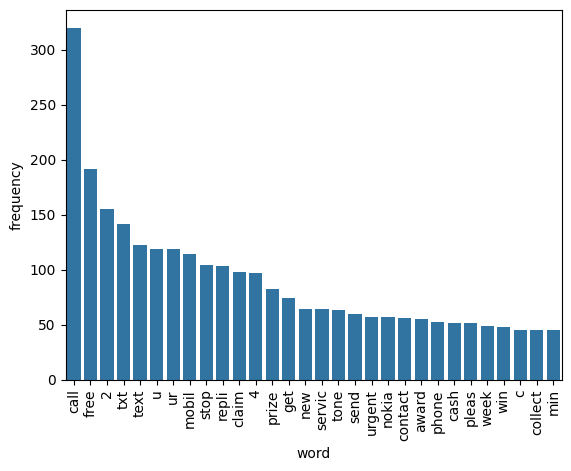

In [129]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Top 30 most common spam words
word_freq = Counter(spam_corpus).most_common(30)
df = pd.DataFrame(word_freq, columns=['word', 'frequency'])

# Seaborn barplot
sns.barplot(x='word', y='frequency', data=df)
plt.xticks(rotation=90)  # optional for readability
plt.show()


In [130]:
ham_corpus=[]
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [131]:
len(ham_corpus)

35404

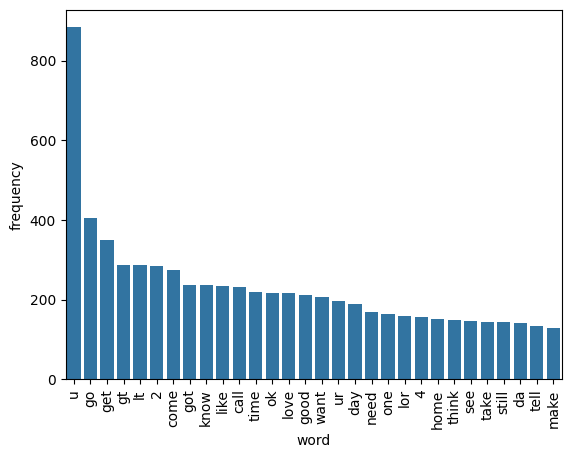

In [132]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Top 30 most common spam words
word_freq = Counter(ham_corpus).most_common(30)
df = pd.DataFrame(word_freq, columns=['word', 'frequency'])

# Seaborn barplot
sns.barplot(x='word', y='frequency', data=df)
plt.xticks(rotation=90)  # optional for readability
plt.show()


4.Model Building

In [133]:
data.head(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


In [134]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)


In [135]:
x= tfidf.fit_transform(data['transformed_text']).toarray()

In [136]:
x.shape

(5169, 3000)

In [137]:
y=data['target'].values

In [138]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [139]:
from sklearn.model_selection import train_test_split


In [140]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [141]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [142]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb =BernoulliNB()

In [143]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [144]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [145]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier




In [147]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    GradientBoostingClassifier
)
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')  # fixed 'penelty' and value
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)   # fixed 'n_estimator'
bc = BaggingClassifier(n_estimators=50, random_state=2)     # fixed 'n_estimator'
etc = ExtraTreeClassifier()  # ExtraTreeClassifier doesn't take n_estimators
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [148]:
clfs ={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [149]:
def train_classifier(clf,x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred =clf.predict(x_test)
    accuracy= accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy, precision

In [150]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [151]:
accuracy_scores=[]
precision_scores=[]

for name, clf in clfs.items():

    current_accuracy, current_precision =train_classifier(clf, x_train, y_train,x_test, y_test)

    print("For ",name)
    print("Accuracy ",current_accuracy)
    print("precision ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For  SVC
Accuracy  0.9758220502901354
precision  0.9747899159663865
For  KN
Accuracy  0.9052224371373307
precision  1.0
For  NB
Accuracy  0.9709864603481625
precision  1.0
For  DT
Accuracy  0.9323017408123792
precision  0.8333333333333334
For  LR
Accuracy  0.9555125725338491
precision  0.96
For  RF
Accuracy  0.9738878143133463
precision  0.9826086956521739
For  AdaBoost
Accuracy  0.9216634429400387
precision  0.8202247191011236
For  BgC
Accuracy  0.9584139264990329
precision  0.8682170542635659
For  ETC
Accuracy  0.9487427466150871
precision  0.8632478632478633
For  GBDT
Accuracy  0.9506769825918762
precision  0.9306930693069307
For  xgb
Accuracy  0.9680851063829787
precision  0.9487179487179487


In [152]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'accuracy':accuracy_scores,'Precision':precision_scores})

In [153]:
performance_df

,Algorithm,accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.932302,0.833333
4,LR,0.955513,0.960000
5,RF,0.973888,0.982609
6,AdaBoost,0.921663,0.820225
7,BgC,0.958414,0.868217
8,ETC,0.948743,0.863248
9,GBDT,0.950677,0.930693


In [154]:
performance_df1= pd.melt(performance_df, id_vars = 'Algorithm')

In [155]:
performance_df

,Algorithm,accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.932302,0.833333
4,LR,0.955513,0.960000
5,RF,0.973888,0.982609
6,AdaBoost,0.921663,0.820225
7,BgC,0.958414,0.868217
8,ETC,0.948743,0.863248
9,GBDT,0.950677,0.930693


In [156]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [157]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [158]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [159]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [160]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [161]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
1,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
2,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
3,DT,0.932302,0.833333,0.932302,0.833333,0.932302,0.833333,0.932302,0.833333
4,LR,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000
5,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
6,AdaBoost,0.921663,0.820225,0.921663,0.820225,0.921663,0.820225,0.921663,0.820225
7,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
8,ETC,0.948743,0.863248,0.948743,0.863248,0.948743,0.863248,0.948743,0.863248
9,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693


In [162]:
# Voting Classifier
from sklearn.ensemble import ExtraTreesClassifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


from sklearn.ensemble import VotingClassifier

In [163]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [164]:
voting.fit(x_train,y_train)


,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [165]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [166]:
# ✅ Imports
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# ✅ Base classifiers
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

# ✅ Final estimator
final_estimator = LogisticRegression()

# ✅ Stacking classifier
clf = StackingClassifier(
    estimators=[
        ('svc', svc),
        ('mnb', mnb),
        ('etc', etc),
        ('xgb', xgb)
    ],
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1
)


In [167]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9609375


In [168]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle

# Assuming data['transformed_text'] and data['target'] exist
x_train, x_test, y_train, y_test = train_test_split(data['transformed_text'], data['target'], test_size=0.2, random_state=2)

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)
x_train_tfidf = tfidf.fit_transform(x_train).toarray()
x_test_tfidf = tfidf.transform(x_test).toarray()

# Train MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)

# Save model and vectorizer
with open('model.pkl', 'wb') as f:
    pickle.dump(mnb, f)
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
print('Model and vectorizer saved successfully.')


In [ ]:
import pickle

# Load model and vectorizer
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Example input for prediction
input_sms = "Congratulations! You have won a free lottery ticket!"

# Transform input and predict
transformed_input = vectorizer.transform([input_sms])
prediction = model.predict(transformed_input)[0]
print('Spam' if prediction == 1 else 'Not Spam')
